In [3]:
### Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plot appears inside notebook
%matplotlib inline

#models from scikit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Models for evalutions

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,f1_score,precision_score

In [4]:
from sklearn.metrics import roc_curve

##### Refer here for descriptions
http://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [8]:
df = pd.read_csv(heart)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.shape

(303, 14)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


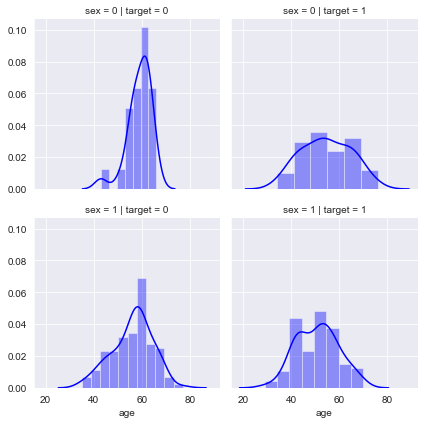

In [21]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data=df,col='target',row='sex')
g.map(sns.distplot,'age',color='b')

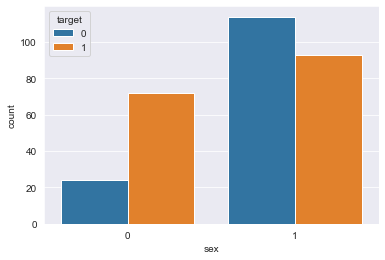

In [23]:
sns.countplot(x='sex',data=df,hue='target')

In [25]:
df.age.head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [26]:

df.target.head()


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [32]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

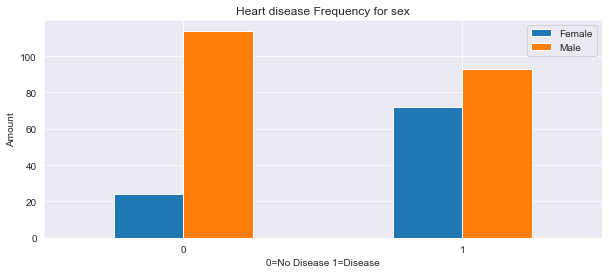

In [49]:
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,4))

plt.title("Heart disease Frequency for sex")
plt.xlabel("0=No Disease 1=Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
plt.yticks(rotation=0)

## Age vs Max Heart rate 

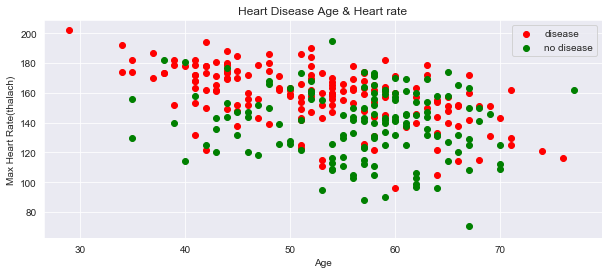

In [55]:
plt.figure(figsize=[10,4])

# df.thalach maximun heart rate

#scatter with +ve 
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='r')

#scatter with -ve
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='g')
plt.title("Heart Disease Age & Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate(thalach)")
plt.legend(['disease',"no disease"])

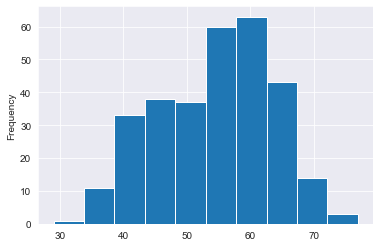

In [58]:
df.age.plot.hist()

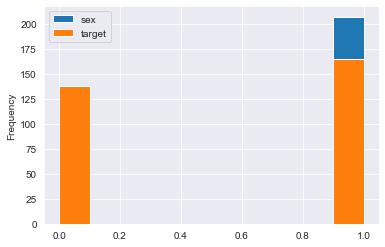

In [61]:
df[['sex','target']].plot.hist()

### Heart disease per chest pain

cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

In [62]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

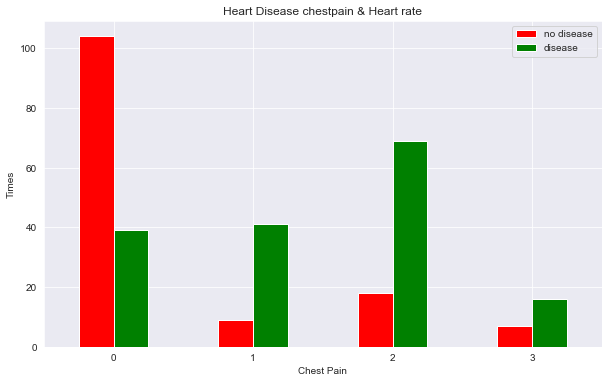

In [80]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title("Heart Disease chestpain & Heart rate")
plt.xlabel("Chest Pain")
plt.ylabel("Times")
plt.legend(['no disease',"disease"])
plt.xticks(rotation=0)

In [72]:
# Make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


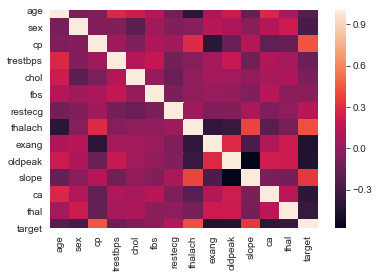

In [73]:
sns.heatmap(df.corr())

(14.0, 0.0)

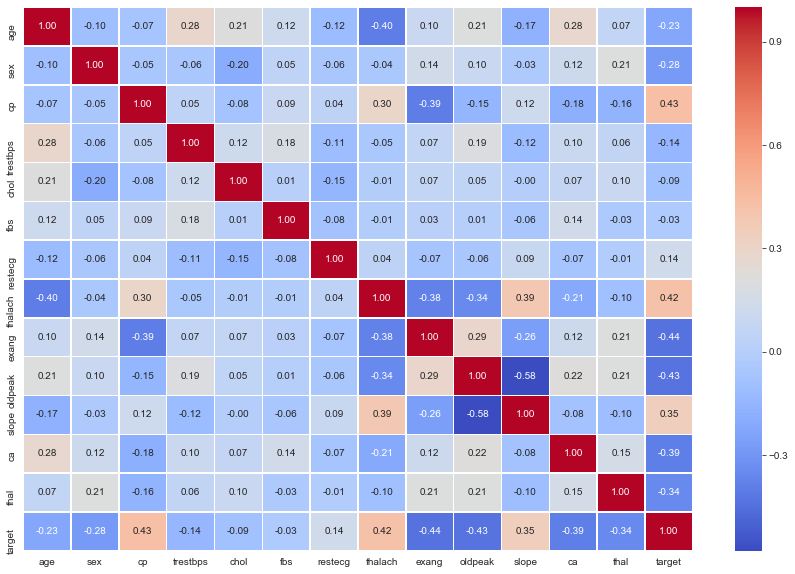

In [79]:
# Lets make more readable

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=[15,10])
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap='coolwarm')

bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top - 0.5)

## Modelling

In [81]:
# Split data

X = df.drop(['target'], axis=1)
y = df['target']

In [82]:
X.shape, y.shape

((303, 13), (303,))

In [88]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
# Put models

models = {
    
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier()
    
}

In [90]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [91]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test
                            )

c:\users\ashok\.conda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
model_scores

{'Logistic Regression': 0.8791208791208791,
 'KNN': 0.5824175824175825,
 'Random Forest': 0.8461538461538461}

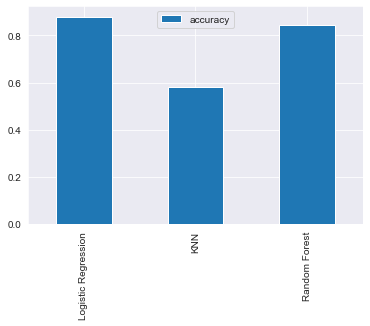

In [94]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

### Hyperparameter tuning 

Lets tune KNN

Max :  0.7252747252747253


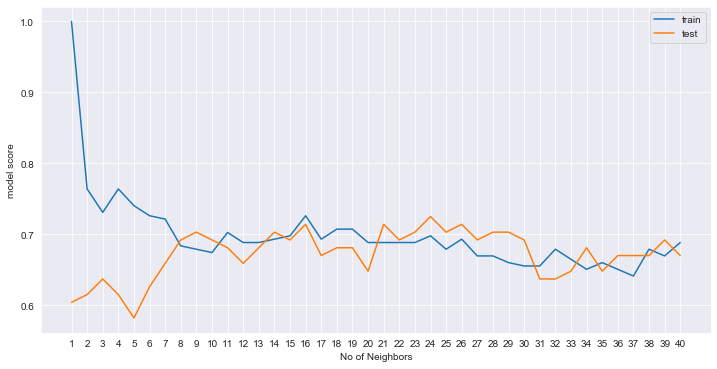

In [105]:
train_scores = []
test_scores = []

neighbors = range(1,41)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

plt.figure(figsize=(12, 6))
plt.plot(neighbors,train_scores, label="train")
plt.plot(neighbors,test_scores, label="test")
plt.xticks(np.arange(1,41,1))
plt.xlabel("No of Neighbors")
plt.ylabel("model score")
plt.legend()

print("Max : ", max(test_scores))

In [100]:
y_test

221    0
8      1
89     1
154    1
201    0
      ..
247    0
85     1
280    0
31     1
190    0
Name: target, Length: 91, dtype: int64

In [101]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != np.array(list(y_test))))

Text(0, 0.5, 'Mean Error')

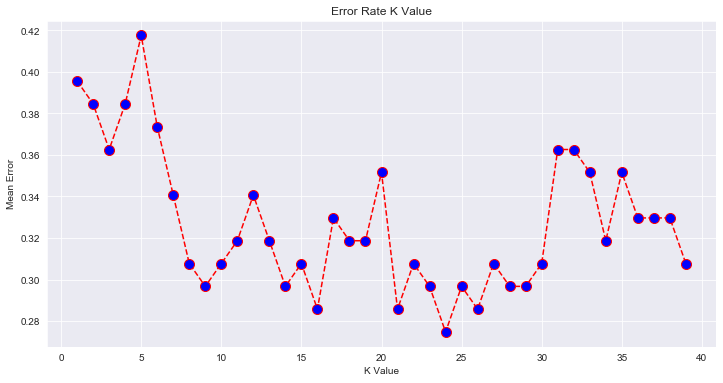

In [102]:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Hyperparameter tuning RandomsearchCV

In [112]:
## Create hyperparameter grid for LogisticRegression

log_red_grid = { 'C':np.logspace(-4,4,20),
                 'solver':["liblinear"]
    
}

## Create hyperparameter grid for LogisticRegression

rf_grid = { "n_estimators": np.arange(10,1000,50),
            "max_depth": [None,3,5,10],
            "min_samples_split" : np.arange(2,20,2)
#             "min_samples_lead" : np.arange(1,20,2)
          }

In [107]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_red_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [108]:
rs_log_reg.score(X_test,y_test)

0.8681318681318682

In [111]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [114]:
rs_rf.score(X_test,y_test)

0.8571428571428571

In [115]:
log_pred = rs_log_reg.predict(X_test)
rf_pred = rs_rf.predict(X_test)

In [116]:
confusion_matrix(y_test, log_pred)

array([[35,  9],
       [ 3, 44]], dtype=int64)

In [121]:
# logistic regression
pd.DataFrame(confusion_matrix(y_test, log_pred), columns=["no disease", "disease"], index=['-ve','+ve'])

,no disease,disease
-ve,35,9
+ve,3,44


In [122]:
# Random Forest
pd.DataFrame(confusion_matrix(y_test, rf_pred), columns=["no disease", "disease"], index=['-ve','+ve'])

,no disease,disease
-ve,34,10
+ve,3,44


In [125]:
y_test.value_counts(sort=False)

0    44
1    47
Name: target, dtype: int64

## Hyperparameter tuning GridSearchCV

In [127]:
## Create hyperparameter grid for LogisticRegression

log_red_grid = { 'C':np.logspace(-4,4,30),
                 'solver':["liblinear"]
    
}

## Create hyperparameter grid for LogisticRegression

rf_grid = { "n_estimators": np.arange(10,1000,100),
            "max_depth": [None,3,5,10],
            "min_samples_split" : np.arange(2,20,2)
#             "min_samples_lead" : np.arange(1,20,2)
          }

In [128]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_red_grid,
                         cv = 5,
                         verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [129]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [130]:
gs_log_reg.best_score_

0.8254716981132075

In [131]:
gs_log_reg.score(X_test,y_test)

0.8681318681318682

In [136]:
import sklearn
print(sklearn.__version__)

0.21.3


## Feature Importance

In [137]:
clf = LogisticRegression(C=1.3738237958832638, solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=1.3738237958832638, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
clf.coef_

array([[ 0.00163584, -1.28759515,  0.82450725, -0.01392458, -0.00322576,
         0.45578953,  0.45114589,  0.0249895 , -0.71820457, -0.47195492,
         0.58249656, -0.68491082, -0.72016145]])

In [139]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [149]:
pd.DataFrame([feature_dict], index=['coeff']).transpose()

,coeff
age,0.001636
sex,-1.287595
cp,0.824507
trestbps,-0.013925
chol,-0.003226
fbs,0.455790
restecg,0.451146
thalach,0.024990
exang,-0.718205
oldpeak,-0.471955


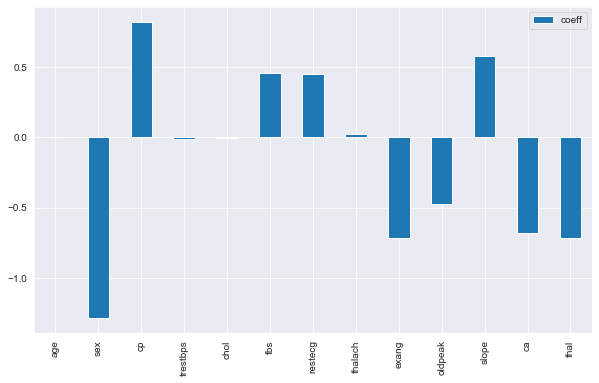

In [148]:
pd.DataFrame([feature_dict], index=['coeff']).T.plot.bar(figsize=(10,6))

slope: the slope of the peak exercise ST segment
* -- Value 1: upsloping
* -- Value 2: flat
* -- Value 3: downsloping

In [151]:
pd.crosstab(df.target,df.slope).transpose()

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
